## Keras - MNIST MLP
### First program with Keras

<div class="alert alert-info">Definitions & Packages.</div>

In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # to disable GPU
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt

def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

### This is a two layer MLP hlayer1 and hlayer2 define  size of hidden layers

In [10]:
batch_size = 128
epochs = 10
hlayer1 = 64
hlayer2 = 64

<div class="alert alert-success">Data load and preparation</div>

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

<div class="alert alert-warning">Network design (2 layers, input layer 784, output 10)</div>

In [13]:
model = Sequential()
model.add(Dense(hlayer1, activation='relu', input_shape=(784,)))
model.add(Dense(hlayer2, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-danger">Network Training</div>

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.9024 - val_loss: 0.1851 - val_accuracy: 0.9452
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1616 - accuracy: 0.9533 - val_loss: 0.1399 - val_accuracy: 0.9576
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1207 - accuracy: 0.9645 - val_loss: 0.1098 - val_accuracy: 0.9659
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9706 - val_loss: 0.1072 - val_accuracy: 0.9669
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9754 - val_loss: 0.0963 - val_accuracy: 0.9707
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9791 - val_loss: 0.0992 - val_accuracy: 0.9702
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0949 - val_accuracy: 0.9713
Epoch 

<div class="alert alert-info">Result Evaluation</div>

Test loss: 0.08956240117549896
Test accuracy: 0.9736999869346619
Train accuracy: 0.9909499883651733


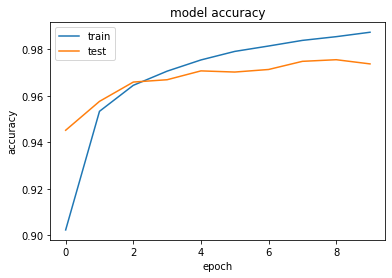

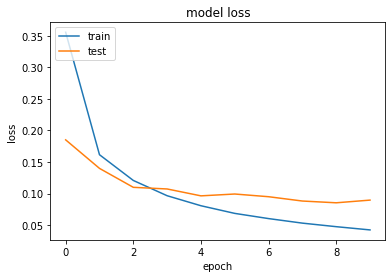

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)

In [8]:
#EOF